# Importing libraries

In [1292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # to split data set

from sklearn.preprocessing import MinMaxScaler # to rescale

from sklearn.feature_selection import RFE # importing RFE from feature selection
from sklearn.linear_model import LinearRegression # importing LinearRegression Class 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")



# 1 Import Dataset and inspection

In [1293]:
BSA = pd.read_csv("C:/Users/Nitin Koundilya/Downloads/day (1).csv") # import dataset

In [1294]:
BSA.head() # inspect dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1295]:
BSA.shape # check for shape

(730, 16)

In [1296]:
BSA.describe() #inspect basic numerical attributes of dataset

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Check for missing values

In [1297]:
BSA.info() # check for basic details, also it is clearly visible that there is no missing value in dataset.

BSA.isnull().sum() #cross-check and confirmation of above statement.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# 2. EDA

## Check for insignificant columns

In [1298]:
#drop insignificant columns 
drop_columns = ["instant","dteday","casual","registered"] #casual and registered are the categorization of total riders hence sum of them is total to riders.

BSA.drop(drop_columns, axis=1, inplace=True)


           temp     atemp
temp   1.000000  0.991696
atemp  0.991696  1.000000


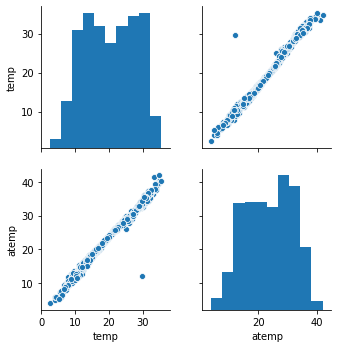

In [1299]:
print(BSA[["temp","atemp"]].corr())
sns.pairplot(BSA[["temp","atemp"]]) 

# as it is clearly visible that temp and atemp is highly cor-related with each other with a co-relation of .991696 one column must be dropped
#hecne will drop 

In [1300]:
BSA.drop("atemp", axis=1, inplace=True) #drop column  atemp

In [1301]:
print(BSA.shape) #after dropping 5 columns check for shape

BSA.head()

(730, 11)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


<Figure size 1080x2520 with 0 Axes>

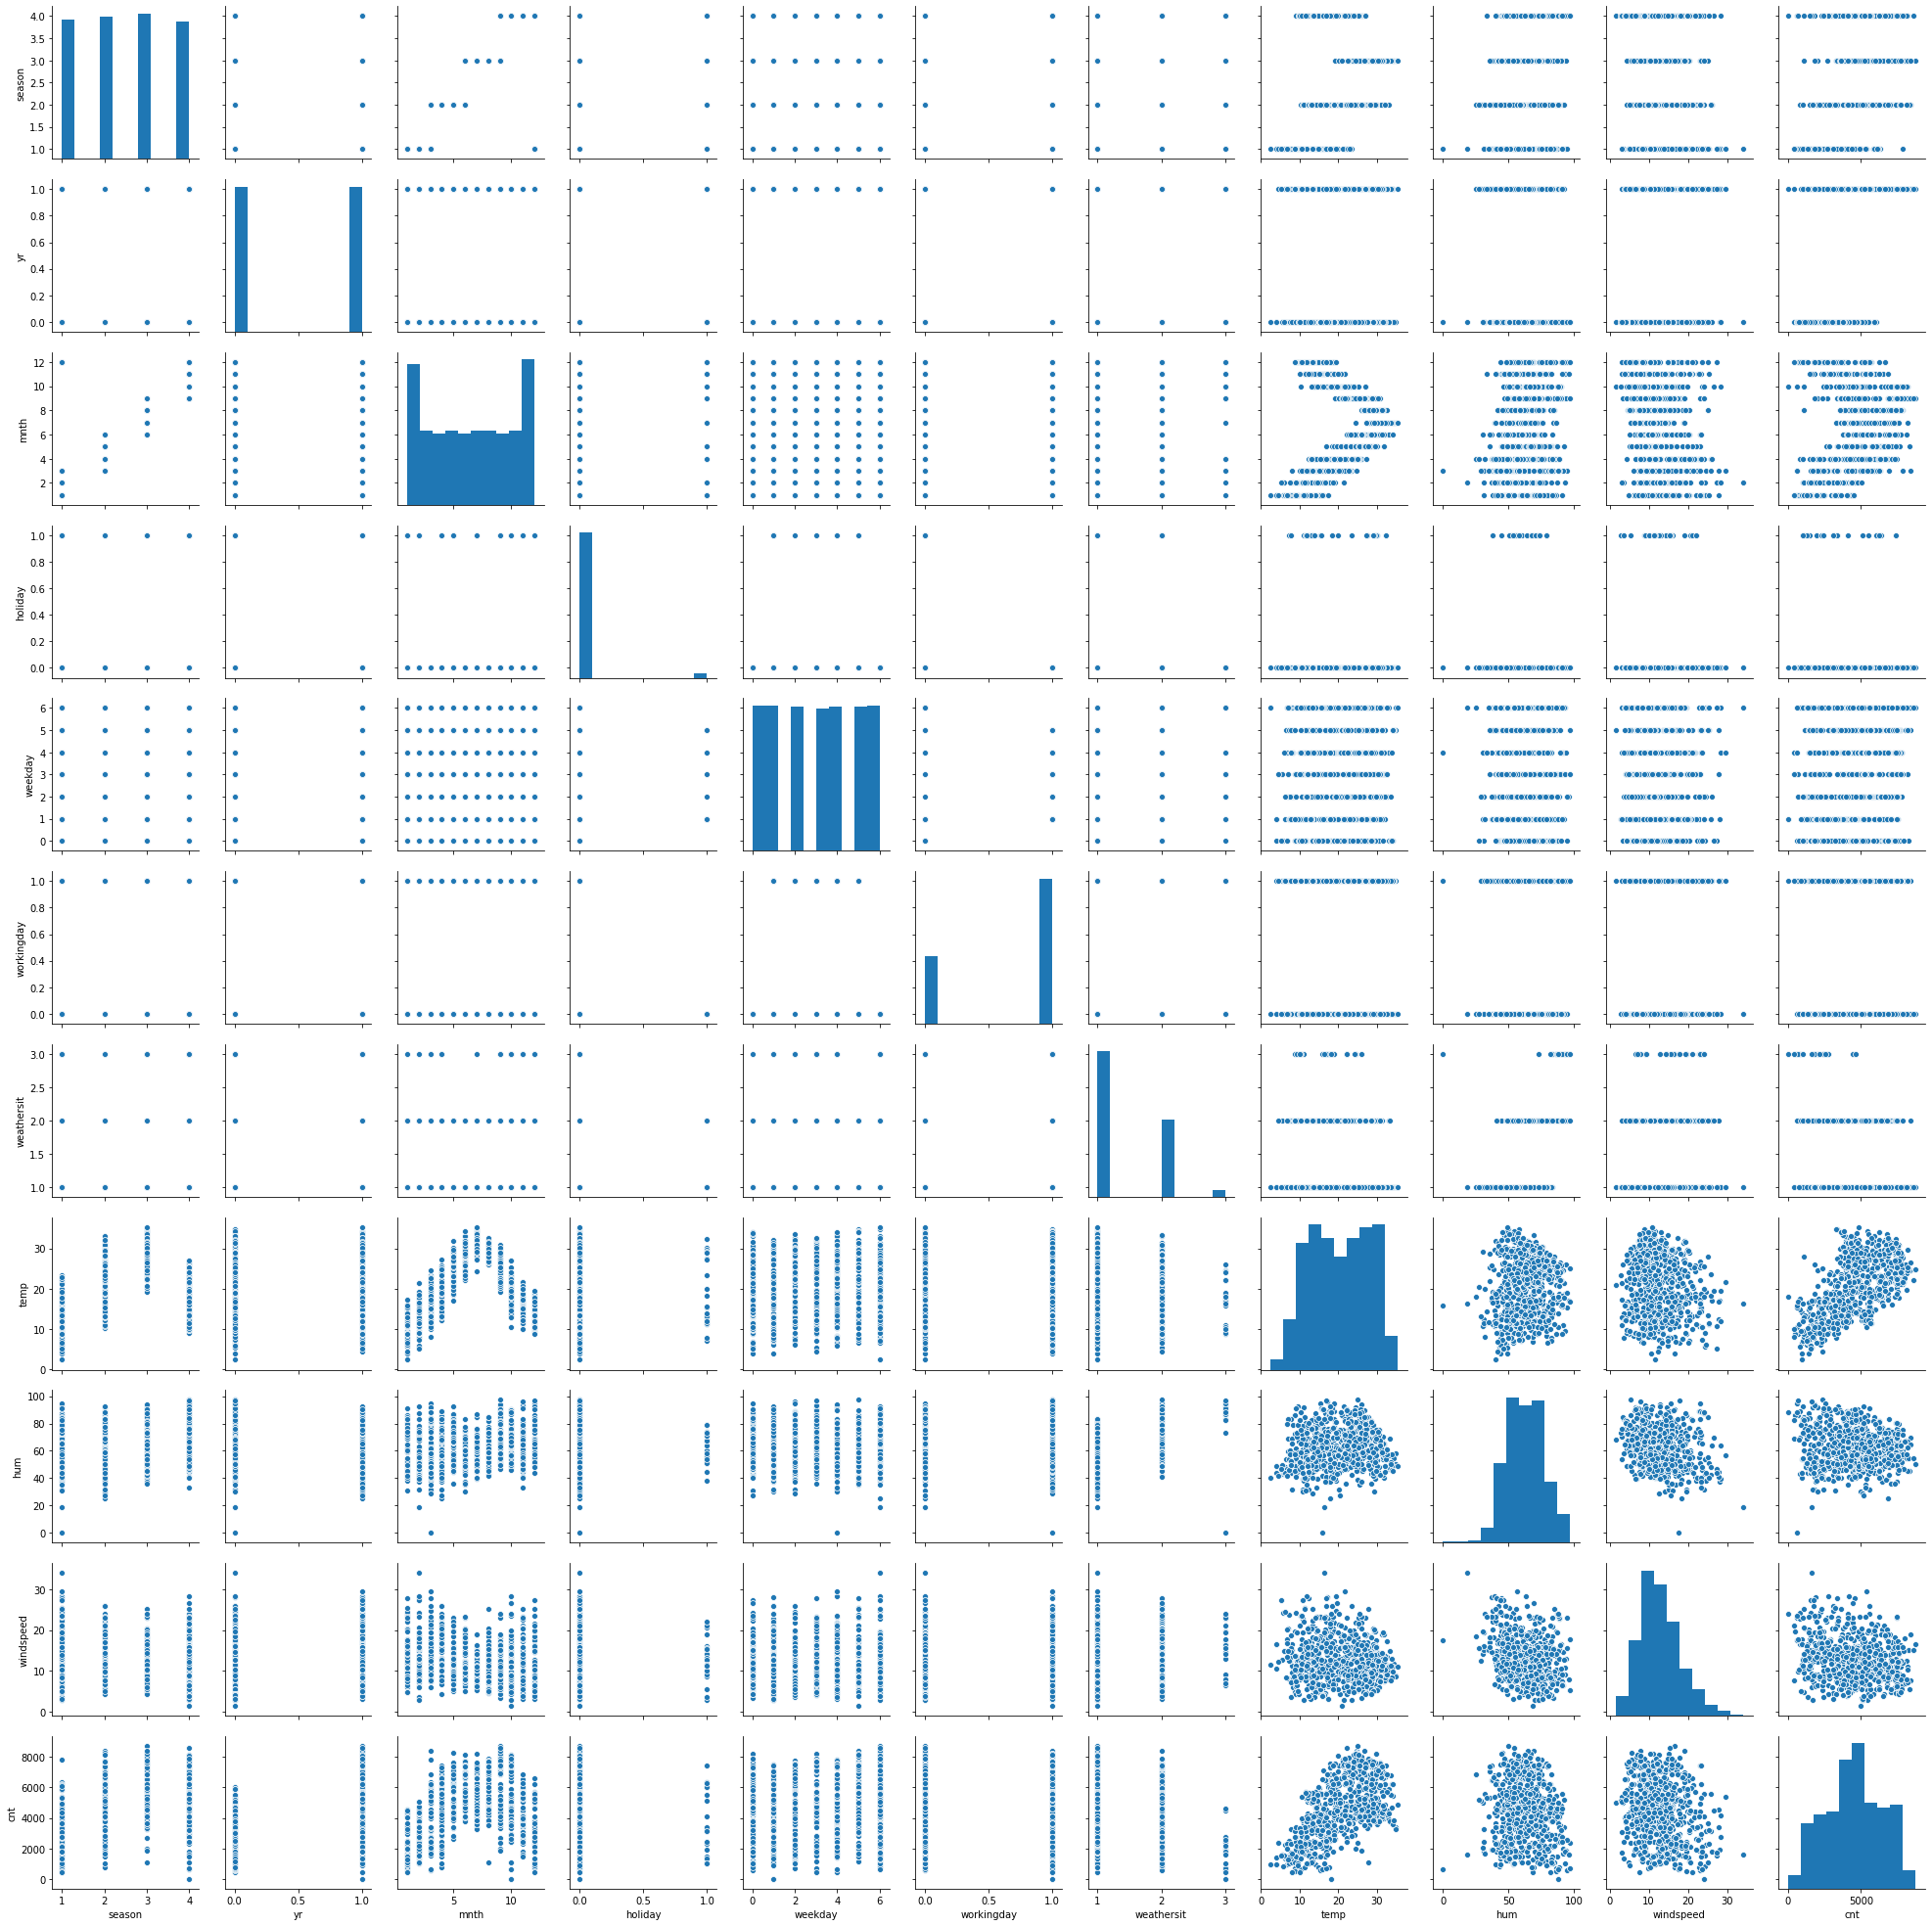

In [1302]:
plt.figure(figsize=(15,35))
sns.pairplot(BSA)
plt.show()

## Visualize relation between continuous and target variable

<Figure size 720x2520 with 0 Axes>

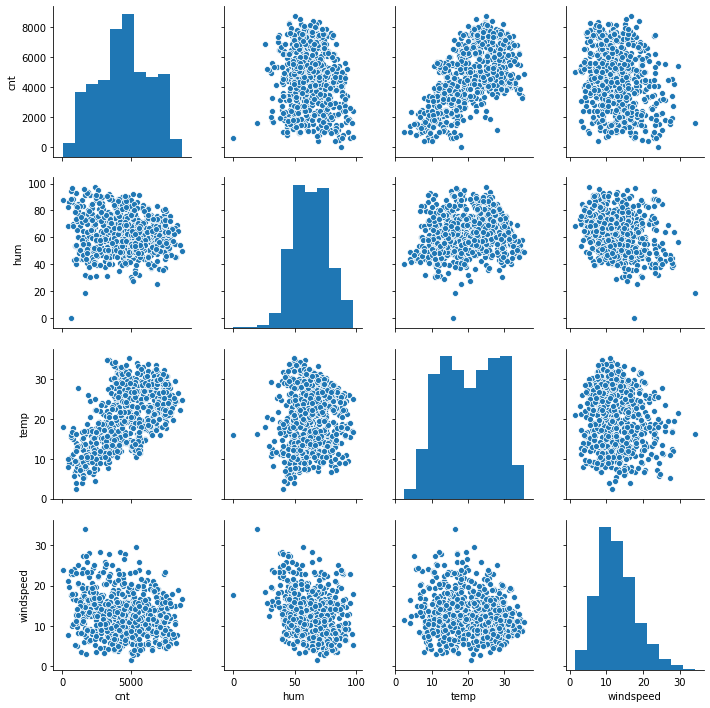

In [1303]:
# check for colinearity by pair-plot between target variable cnt and continuous variables 

plt.figure(figsize=(10,35))

sns.pairplot(BSA[["cnt","hum","temp","windspeed"]]) 

plt.show()

### Observation: Upon visualizing scatter plot between target variable cnt and other continuous variables it looks like there is a linear relation between cnt and temp.

## Visualize relation between categorical variables and target variable

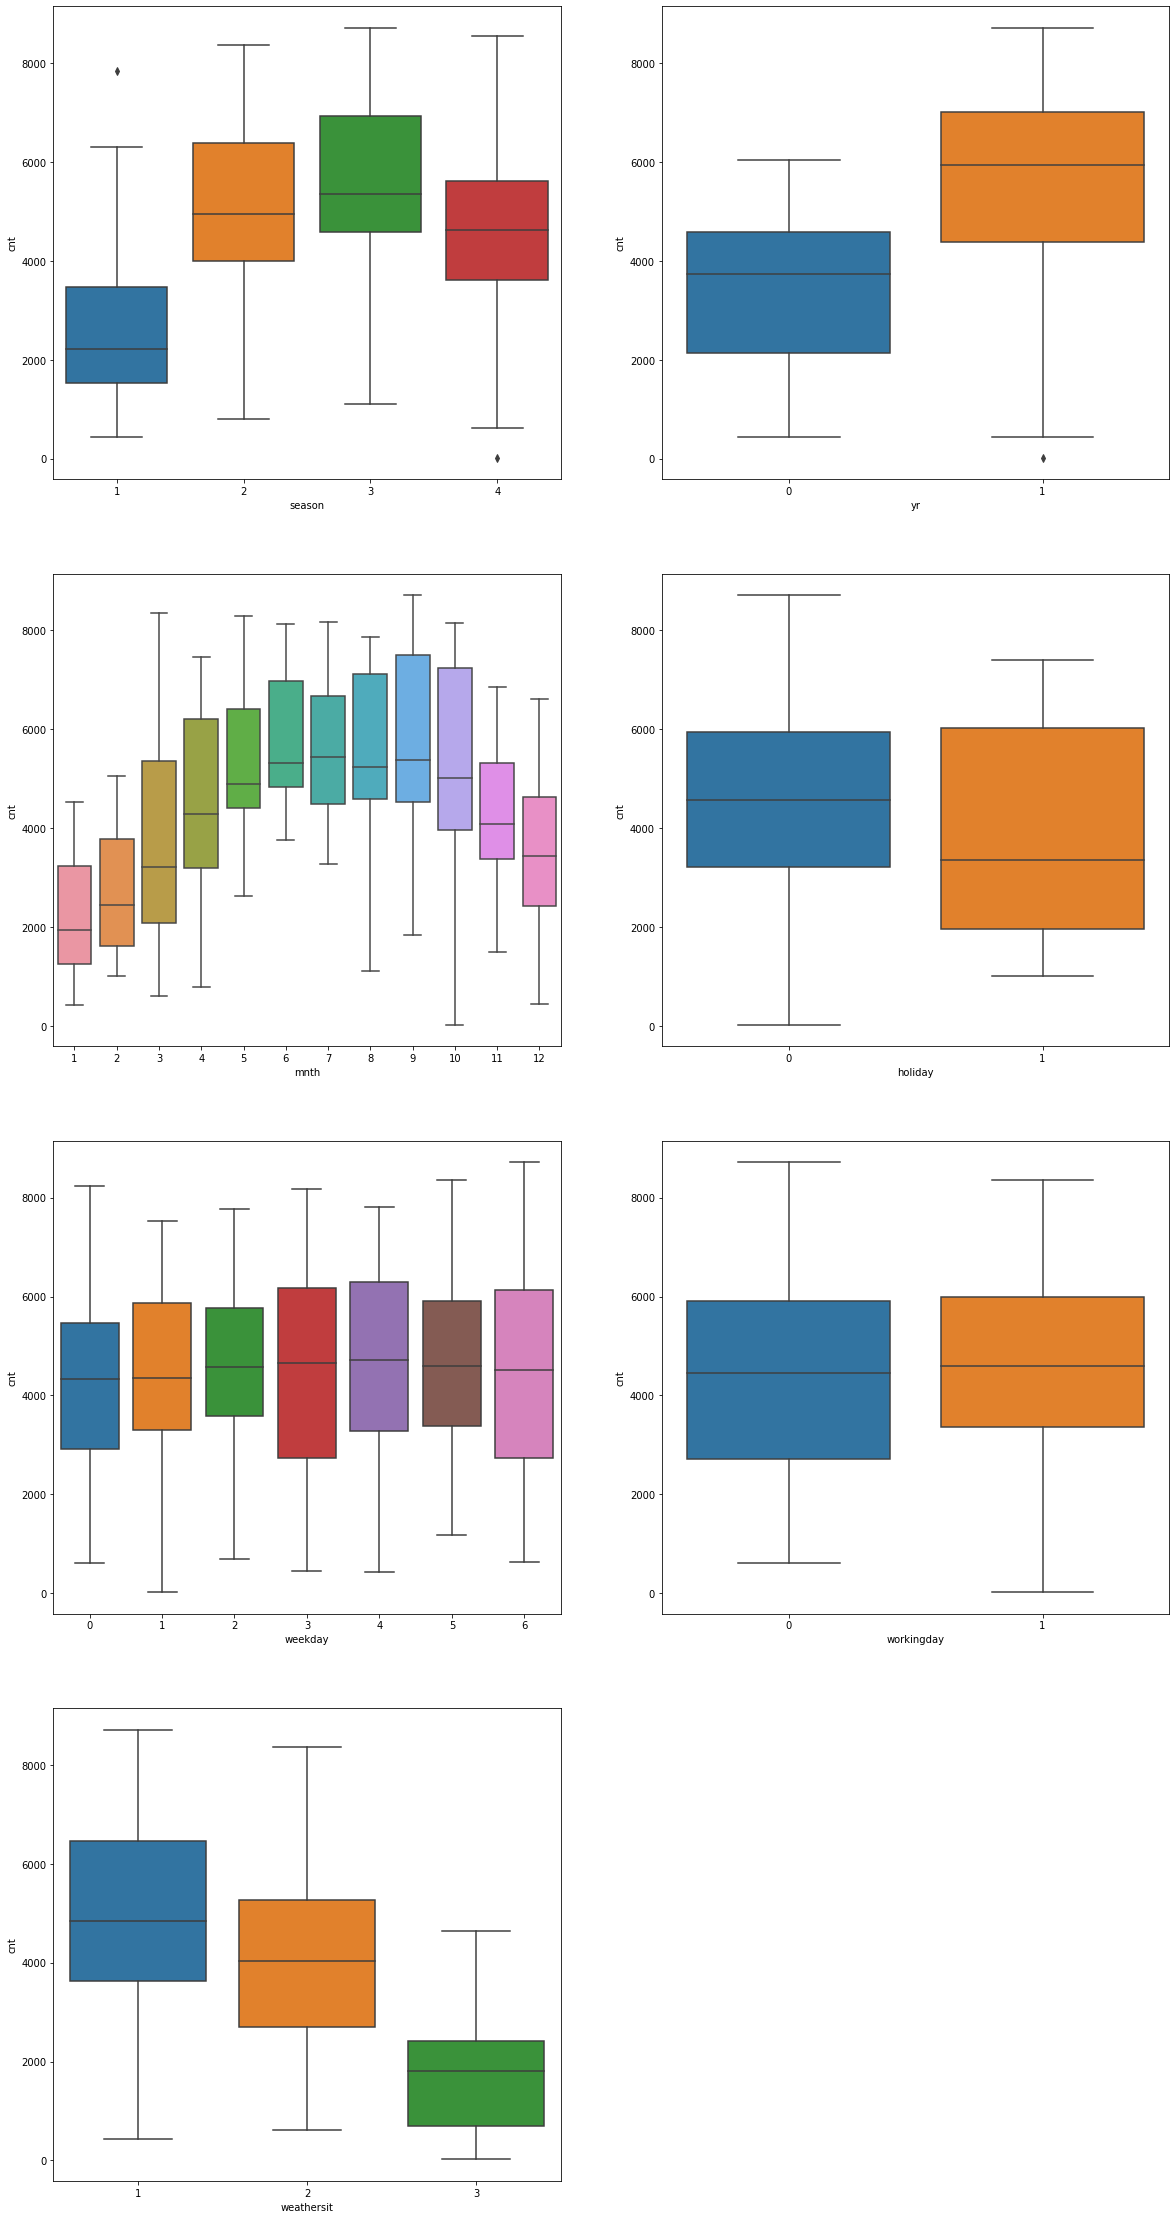

In [1304]:
#plotting box plot for categorical variables

plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
sns.boxplot(x="season", y="cnt", data=BSA)
plt.subplot(4,2,2)
sns.boxplot(x="yr", y="cnt", data=BSA)
plt.subplot(4,2,3)
sns.boxplot(x="mnth", y="cnt", data=BSA)
plt.subplot(4,2,4)
sns.boxplot(x="holiday", y="cnt", data=BSA)
plt.subplot(4,2,5)
sns.boxplot(x="weekday", y="cnt", data=BSA)
plt.subplot(4,2,6)
sns.boxplot(x="workingday", y="cnt", data=BSA)
plt.subplot(4,2,7)
sns.boxplot(x="weathersit", y="cnt", data=BSA)
plt.show()

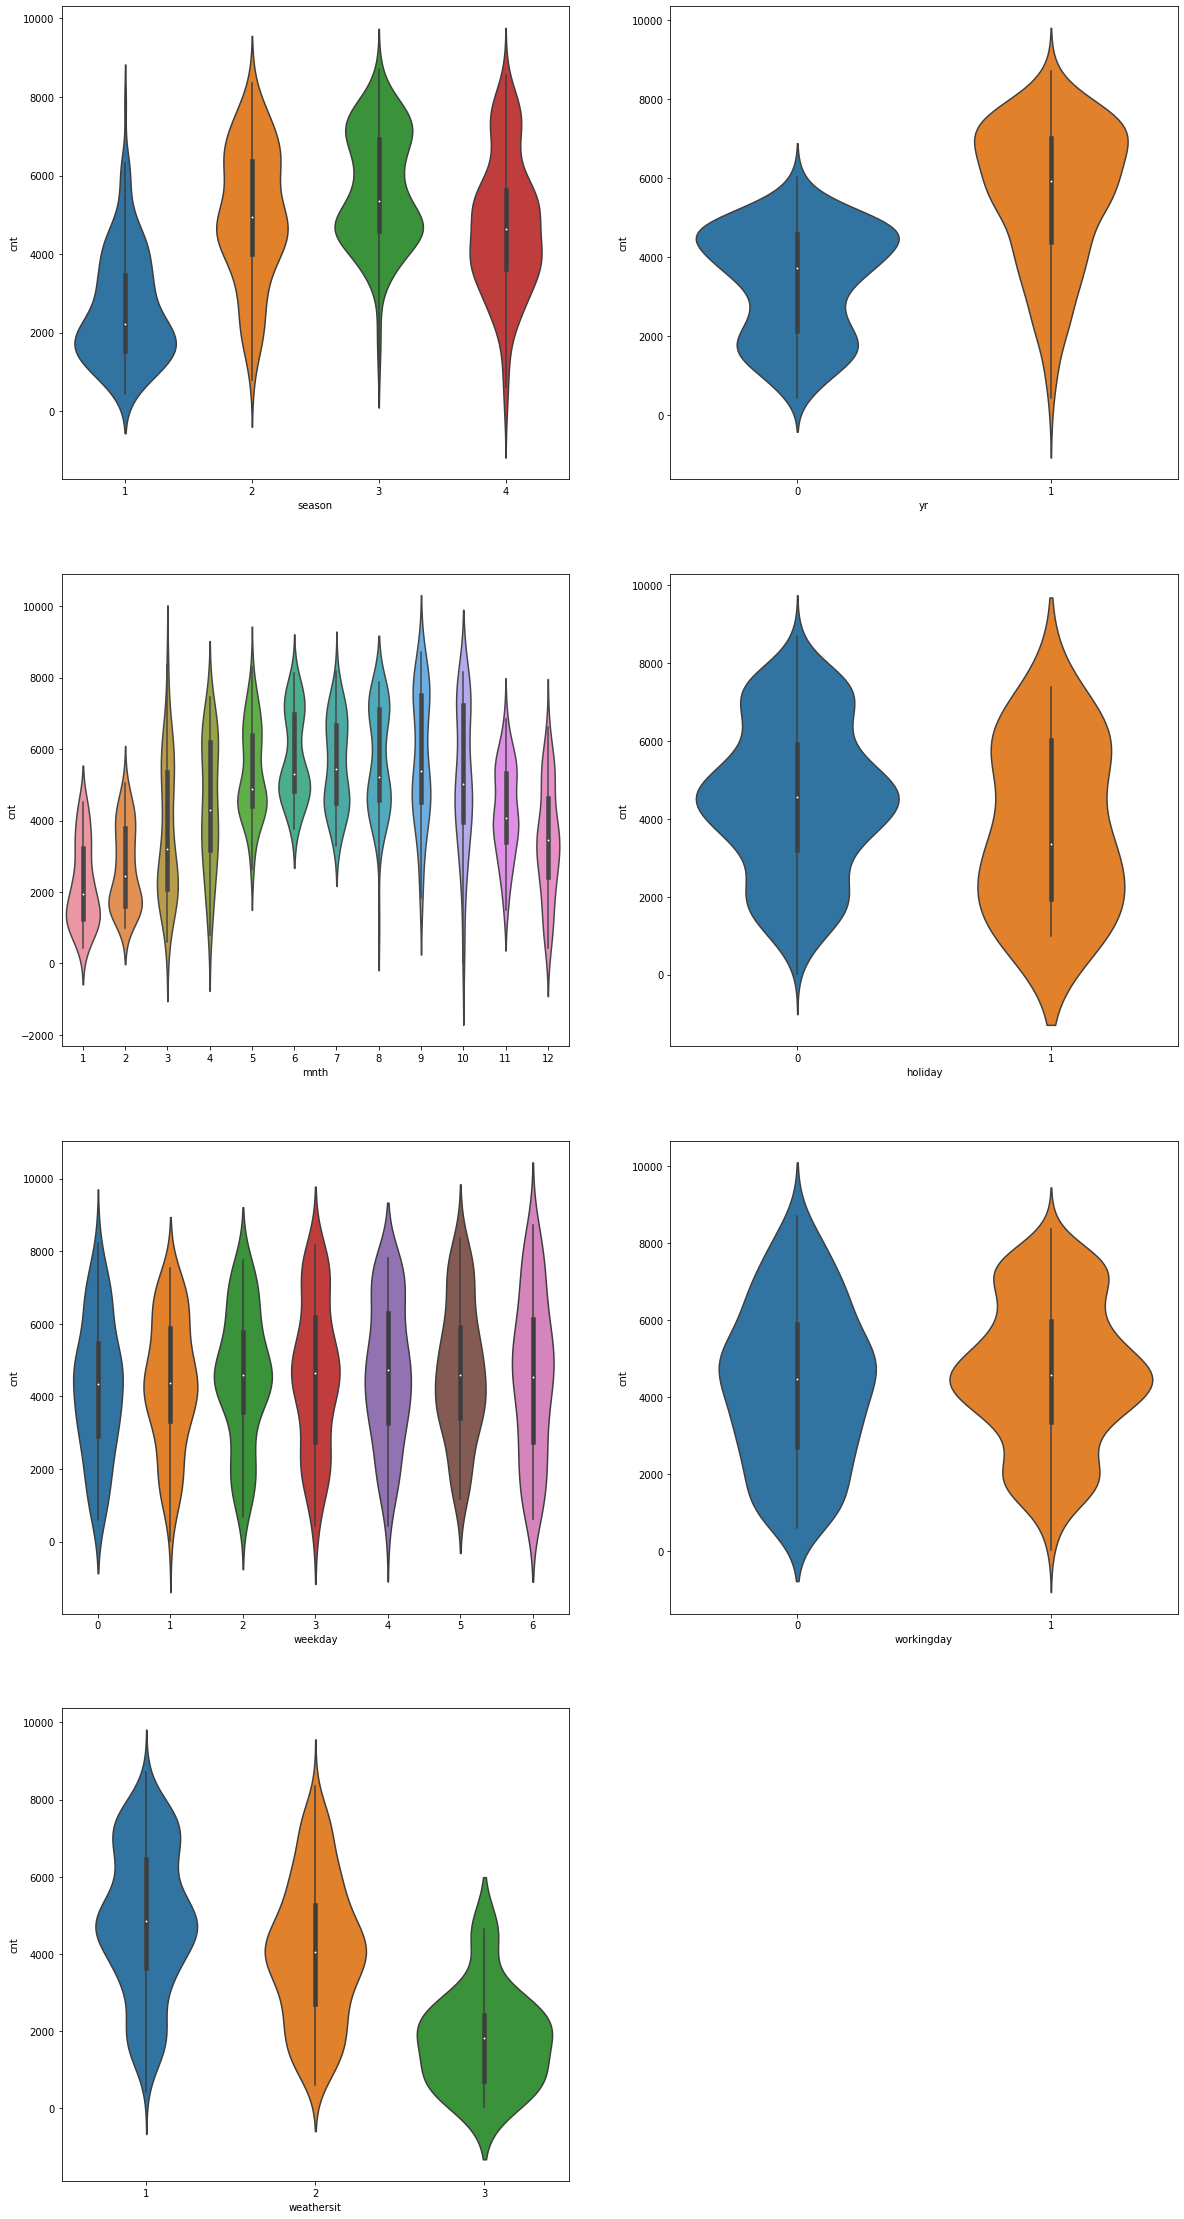

In [1305]:
#plotting violin plot for categorical variables

plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
sns.violinplot(x="season", y="cnt", data=BSA)
plt.subplot(4,2,2)
sns.violinplot(x="yr", y="cnt", data=BSA)
plt.subplot(4,2,3)
sns.violinplot(x="mnth", y="cnt", data=BSA)
plt.subplot(4,2,4)
sns.violinplot(x="holiday", y="cnt", data=BSA)
plt.subplot(4,2,5)
sns.violinplot(x="weekday", y="cnt", data=BSA)
plt.subplot(4,2,6)
sns.violinplot(x="workingday", y="cnt", data=BSA)
plt.subplot(4,2,7)
sns.violinplot(x="weathersit", y="cnt", data=BSA)
plt.show()

### OBSERVATION: 
    - Season 2,3 & 4 i.e. summer fall and winter shows higher number of riders as compared to season 1:spring
    - 2019 surely have high numbers of riders which implies number of riders were increasing.
    - There is sort of bell curve in the number of riders for a year starting from January and to December.
    - not such of difference between holiday and working day and weekdays. 
    - But surprisingly on holiday average is lower however compared to working and non-working day it is closely same

## Check for co-relation

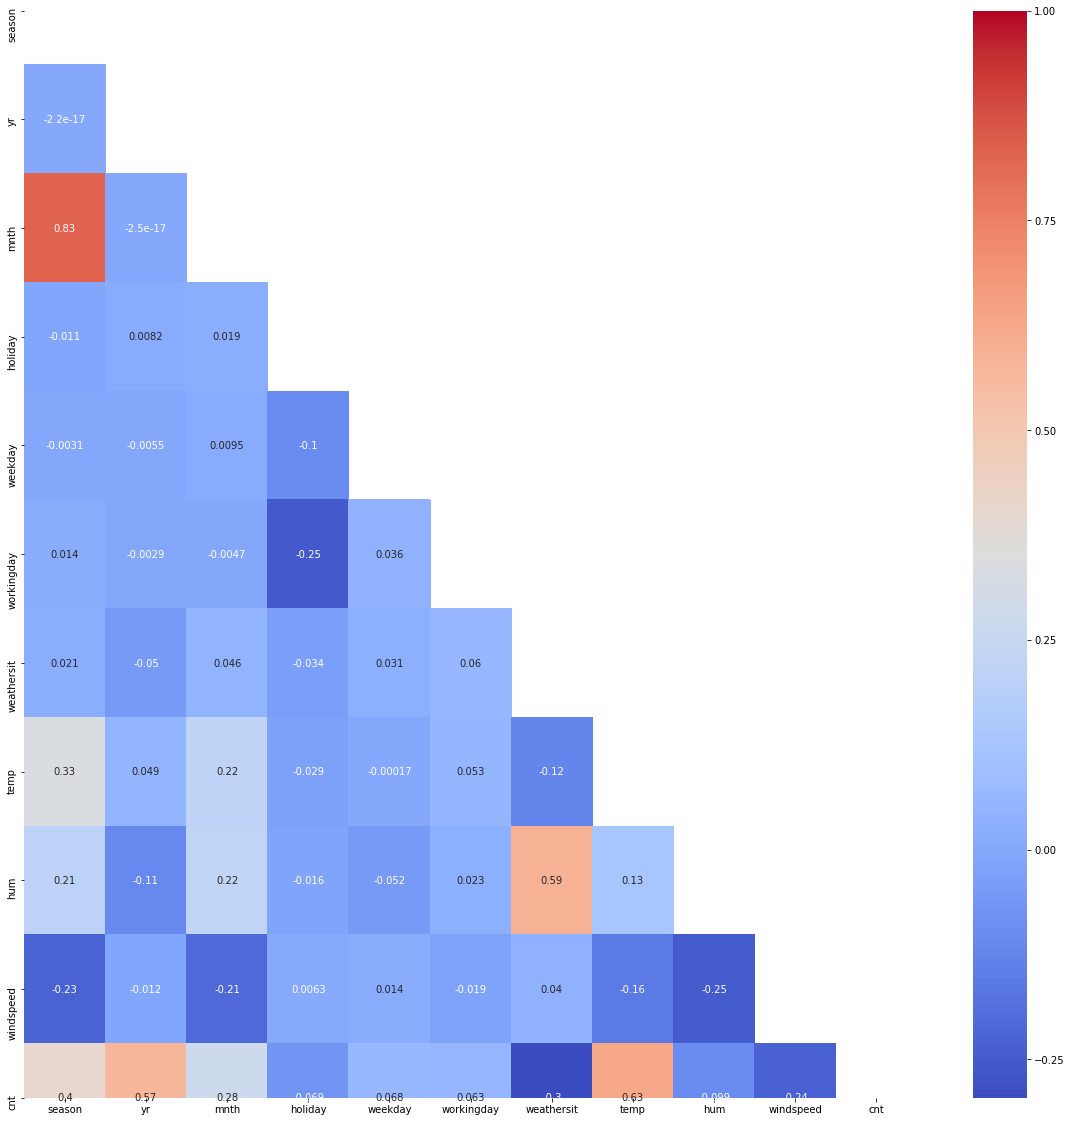

In [1306]:
#check for co-relation between all variables 

plt.figure(figsize=(20,20))
matrix = np.triu(BSA.corr()) 
sns.heatmap(BSA.corr(), cmap="coolwarm", mask=matrix,annot=True, fmt='.2g')
plt.show()


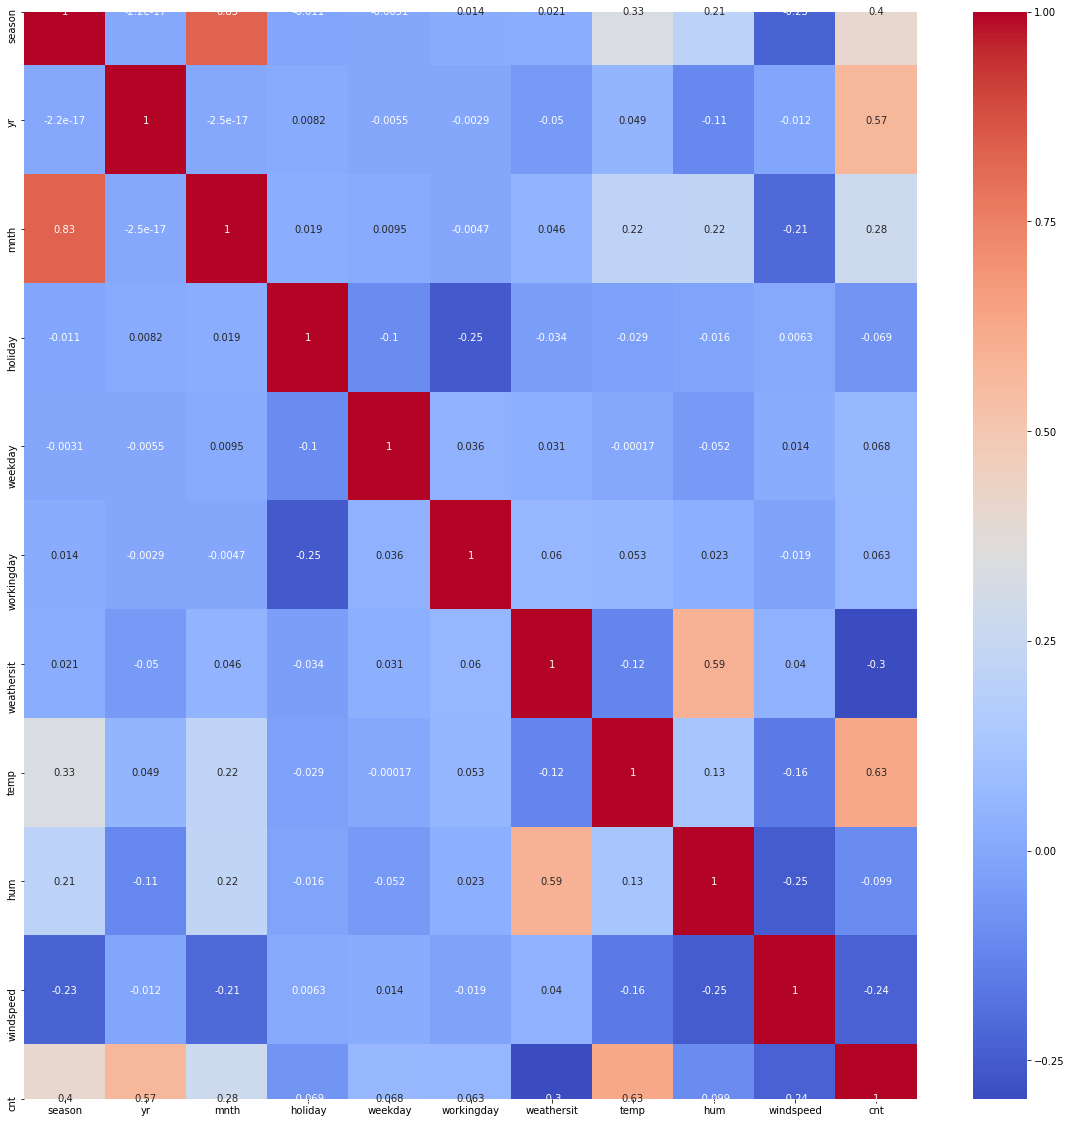

In [1307]:

plt.figure(figsize=(20,20))
matrix = np.triu(BSA.corr()) 
sns.heatmap(BSA.corr(), cmap="coolwarm",annot=True, fmt='.2g')
plt.show()


### Observation: It is clearly visible that windspeed, weathersit, holiday and humidity is negatively co-related with number of riders

# 3. Data Preparation

In [1308]:
BSA.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,48.2917,14.958889,1321


###### Variable that need to mapped so that dummy variables can be created.
    - season 
    - mnth
    - weekday
    - weathersit
    

In [1309]:
#mapping column season

BSA["season"] = BSA["season"].map({1:"spring", 2:"summer",  3:"fall", 4:"winter"})


In [1310]:
BSA["season"].head(40) # cross check
BSA["season"].tail(40) # cross check

690    winter
691    winter
692    winter
693    winter
694    winter
695    winter
696    winter
697    winter
698    winter
699    winter
700    winter
701    winter
702    winter
703    winter
704    winter
705    winter
706    winter
707    winter
708    winter
709    winter
710    winter
711    winter
712    winter
713    winter
714    winter
715    winter
716    winter
717    winter
718    winter
719    spring
720    spring
721    spring
722    spring
723    spring
724    spring
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, dtype: object

In [1311]:
# Mapping column nmonth

BSA["mnth"] = BSA["mnth"].map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

In [1312]:
BSA.mnth # cross-check

0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: mnth, Length: 730, dtype: object

In [1313]:
#Mapping column weekday
BSA["weekday"] = BSA["weekday"].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [1314]:
BSA.weekday #cross-check

0       Saturday
1         Sunday
2         Monday
3        Tuesday
4      Wednesday
         ...    
725     Thursday
726       Friday
727     Saturday
728       Sunday
729       Monday
Name: weekday, Length: 730, dtype: object

In [1315]:
#Mapping column weathersit

BSA["weathersit"] = BSA["weathersit"].map({1: "Clear", 2:"Misty, Cloudy", 3:"Light Rain/Snow/Thunderstorm", 4:"Heavy Rain"})

In [1316]:
BSA["weathersit"].head() # cross check

0    Misty, Cloudy
1    Misty, Cloudy
2            Clear
3            Clear
4            Clear
Name: weathersit, dtype: object

In [1317]:
BSA # check the data set

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,"Misty, Cloudy",14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,"Misty, Cloudy",14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,"Misty, Cloudy",10.420847,65.2917,23.458911,2114
726,spring,1,December,0,Friday,1,"Misty, Cloudy",10.386653,59.0000,10.416557,3095
727,spring,1,December,0,Saturday,0,"Misty, Cloudy",10.386653,75.2917,8.333661,1341
728,spring,1,December,0,Sunday,0,Clear,10.489153,48.3333,23.500518,1796


###### CREATING DUMMY VARIABLES OF CATEGORICAL COLUMNS 

In [1318]:
# Creating dummy variables

season_dummy = pd.get_dummies(BSA["season"], drop_first=True)
mnth_dummy =pd.get_dummies(BSA["mnth"], drop_first=True)
weekday_dummy = pd.get_dummies(BSA["weekday"], drop_first=True)
weathersit_dummy = pd.get_dummies(BSA["weathersit"], drop_first=True)

In [1319]:
season_dummy #crosscheck

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [1320]:
mnth_dummy #crosscheck

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [1321]:
weekday_dummy #cross-check

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [1322]:
weathersit_dummy #cross-check

,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [1323]:
#concat all the dummy variables to main data set
BSA = pd.concat([BSA,season_dummy,weekday_dummy,mnth_dummy,weathersit_dummy], axis=1)

In [1324]:
#cross-check
pd.set_option("display.max_column",50)
BSA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
0,spring,0,January,0,Saturday,0,"Misty, Cloudy",14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,"Misty, Cloudy",14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,"Misty, Cloudy",10.420847,65.2917,23.458911,2114,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
726,spring,1,December,0,Friday,1,"Misty, Cloudy",10.386653,59.0000,10.416557,3095,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
727,spring,1,December,0,Saturday,0,"Misty, Cloudy",10.386653,75.2917,8.333661,1341,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,spring,1,December,0,Sunday,0,Clear,10.489153,48.3333,23.500518,1796,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1325]:
BSA.drop(["season","mnth","weekday","weathersit"], inplace=True, axis=1)

In [1326]:
BSA # cross-check

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# 4. Split the data into train set and test set

In [1327]:
np.random.seed(0)

BSA_train, BSA_test = train_test_split(BSA, train_size = 0.8, test_size= 0.2, random_state = 100)

In [1328]:
BSA

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1329]:
BSA_train #cross-check

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
367,1,0,1,6.150000,44.1250,24.499957,2236,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
648,1,0,1,17.835000,46.3333,12.166932,7570,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
44,0,0,1,17.015000,37.5833,27.999836,1913,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
705,1,0,1,13.154153,76.4167,8.750200,5008,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
379,1,0,0,6.833347,41.9167,16.834286,2311,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
79,0,0,1,17.647835,73.7391,19.348461,2077,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [1330]:
BSA_test #cross-check

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,1,31.365000,59.2083,12.875725,4326,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
719,1,0,1,13.393347,55.6667,25.083661,3623,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
392,1,0,0,12.949153,54.3333,14.125543,4023,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Re-scaling

In [1331]:

scaler = MinMaxScaler() #creating scaler object

var_list = ["hum","temp","windspeed"] #list of columns, need to be re-scaled

BSA_train[var_list] = scaler.fit_transform(BSA_train[var_list]) #applying fit_transform method


In [1332]:
BSA_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
367,1,0,1,0.113228,0.454701,0.695175,2236,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,7570,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,1913,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,5008,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,2311,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,7261,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1917,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,2739,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,2077,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [1333]:
BSA_train.describe()  # cross check

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,4505.267123,0.251712,0.246575,0.250000,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,1958.617712,0.434369,0.431387,0.433384,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,3070.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,4566.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,6035.750000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y for model building

In [1334]:
# y_train := target variable 
# X_train := Attributes / predictor variables

y_train = BSA_train.pop("cnt")
X_train = BSA_train

In [1335]:
y_train#cross-check

367    2236
648    7570
44     1913
705    5008
379    2311
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 584, dtype: int64

In [1336]:
X_train #cross-check

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# 5. Build the model using Recursive Feature Elimination method

In [1337]:
lm = LinearRegression()

lm.fit(X_train, y_train) 

rfe = RFE(lm, 16) #running RFE on all predictor variables
rfe = rfe.fit(X_train,y_train)

In [1338]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) 

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Monday', False, 5),
 ('Saturday', True, 1),
 ('Sunday', False, 3),
 ('Thursday', False, 11),
 ('Tuesday', False, 6),
 ('Wednesday', False, 12),
 ('August', False, 8),
 ('December', True, 1),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 10),
 ('March', False, 13),
 ('May', False, 7),
 ('November', True, 1),
 ('October', False, 9),
 ('September', True, 1),
 ('Light Rain/Snow/Thunderstorm', True, 1),
 ('Misty, Cloudy', True, 1)]

In [1339]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Saturday', 'December', 'January', 'July', 'November',
       'September', 'Light Rain/Snow/Thunderstorm', 'Misty, Cloudy'],
      dtype='object')

In [1340]:
X_train.columns[~rfe.support_]

Index(['summer', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'August', 'February', 'June', 'March', 'May', 'October'],
      dtype='object')

##### Using Stats Model for detailed statistics 

In [1341]:
# Creating X_train dataset with RFE selected columns

X_train_sm = X_train[col]


In [1342]:
#add constant
X_train_sm = sm.add_constant(X_train_sm)

In [1343]:
lm_sm = sm.OLS(y_train, X_train_sm).fit() #runnig the linear model

In [1344]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     207.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.08e-224
Time:                        12:33:53   Log-Likelihood:                -4692.8
No. Observations:                 584   AIC:                             9420.
Df Residuals:                     567   BIC:                             9494.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [1345]:
X_train_sm.drop("holiday", axis=1, inplace=True)


In [1346]:
X_train_sm.drop("const", axis=1, inplace=True)

In [1347]:
VIF = pd.DataFrame()
VIF["Features"] = X_train_sm.columns
VIF["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
VIF = VIF.sort_values(by ="VIF", ascending = False )
VIF

,Features,VIF
3,hum,25.889887
2,temp,18.147812
1,workingday,4.449004
4,windspeed,4.267847
5,spring,3.036072
6,winter,2.774406
14,"Misty, Cloudy",2.287706
0,yr,2.081092
7,Saturday,1.771750
9,January,1.707056


#### Clearly we need to get rid of either humidity as it is highly co-related 

In [1348]:
X_train_sm.drop("hum", axis=1, inplace=True)


In [1349]:
X_train_sm #cross-check

,yr,workingday,temp,windspeed,spring,winter,Saturday,December,January,July,November,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
367,1,1,0.113228,0.695175,1,0,0,0,1,0,0,0,0,0
648,1,1,0.468352,0.299450,0,1,0,0,0,0,0,0,0,0
44,0,1,0.443431,0.807474,1,0,0,0,0,0,0,0,0,0
705,1,1,0.326094,0.189819,0,1,0,1,0,0,0,0,0,1
379,1,0,0.133996,0.449210,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,1,1,1,0,0,0,0,0,1
79,0,1,0.462664,0.529881,0,0,0,0,0,0,0,0,0,1


In [1350]:
X_train_sm = sm.add_constant(X_train_sm)

In [1351]:
# Running the linear model after dropping "hum" column
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.36e-223
Time:                        12:33:54   Log-Likelihood:                -4702.5
No. Observations:                 584   AIC:                             9435.
Df Residuals:                     569   BIC:                             9500.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [1352]:
X_train_sm.drop("const", axis=1, inplace=True)

In [1353]:
VIF = pd.DataFrame()
VIF["Features"] = X_train_sm.columns
VIF["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
VIF = VIF.sort_values(by ="VIF", ascending = False )
VIF

,Features,VIF
2,temp,6.631241
1,workingday,4.346190
3,windspeed,4.262948
4,spring,2.441096
5,winter,2.403002
0,yr,2.072865
6,Saturday,1.755954
10,November,1.668603
8,January,1.624111
13,"Misty, Cloudy",1.547343


#### Temperature can be dropped considering its VIF

In [1354]:
X_train_VIF = X_train_sm.drop("temp", axis=1, inplace=True)

In [1355]:
X_train_sm #cross-check

,yr,workingday,windspeed,spring,winter,Saturday,December,January,July,November,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
367,1,1,0.695175,1,0,0,0,1,0,0,0,0,0
648,1,1,0.299450,0,1,0,0,0,0,0,0,0,0
44,0,1,0.807474,1,0,0,0,0,0,0,0,0,0
705,1,1,0.189819,0,1,0,1,0,0,0,0,0,1
379,1,0,0.449210,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,1,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.431816,0,1,1,1,0,0,0,0,0,1
79,0,1,0.529881,0,0,0,0,0,0,0,0,0,1


In [1356]:
#add constant
X_train_sm = sm.add_constant(X_train_sm)

In [1357]:
# Running the linear model after dropping "Temperature" column
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     176.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.38e-190
Time:                        12:33:55   Log-Likelihood:                -4783.0
No. Observations:                 584   AIC:                             9594.
Df Residuals:                     570   BIC:                             9655.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Dropping July column as it has high P value

In [1358]:
X_train_sm.drop("July", axis=1, inplace=True)

In [1359]:
# Running the linear model after dropping "July" column
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     191.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.33e-191
Time:                        12:33:55   Log-Likelihood:                -4783.4
No. Observations:                 584   AIC:                             9593.
Df Residuals:                     571   BIC:                             9650.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Dropping Winter as it has high p Value

In [1360]:
X_train_sm.drop("winter", axis=1, inplace=True)

In [1361]:
# Running the linear model after dropping "Winter" column
lm_sm = sm.OLS(y_train, X_train_sm).fit()
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.44e-192
Time:                        12:33:56   Log-Likelihood:                -4784.1
No. Observations:                 584   AIC:                             9592.
Df Residuals:                     572   BIC:                             9645.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [1362]:
X_train_sm.drop("const", axis=1, inplace=True)

In [1363]:
VIF = pd.DataFrame()
VIF["Features"] = X_train_sm.columns
VIF["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
VIF = VIF.sort_values(by ="VIF", ascending = False )
VIF

,Features,VIF
2,windspeed,3.470325
1,workingday,2.982288
3,spring,2.055074
0,yr,1.874112
6,January,1.584610
10,"Misty, Cloudy",1.505337
4,Saturday,1.478649
5,December,1.134962
8,September,1.118234
7,November,1.114553


In [1364]:
X_train_sm = sm.add_constant(X_train_sm)

In [1365]:
lm_sm.params

const                           4591.899500
yr                              2103.097315
workingday                       545.772869
windspeed                      -1746.542296
spring                         -2049.775758
Saturday                         617.809332
December                        -990.014942
January                        -1032.474722
November                        -944.178323
September                        583.405741
Light Rain/Snow/Thunderstorm   -2770.756221
Misty, Cloudy                   -785.714514
dtype: float64

### Residual analysis of the Trained data

In [1366]:
y_train_riders = lm_sm.predict(X_train_sm)


In [1367]:
Residual = (y_train - y_train_riders)

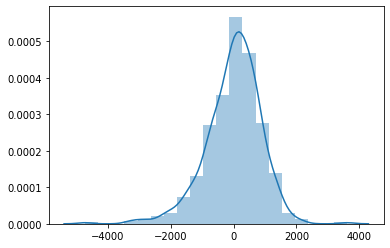

In [1368]:
sns.distplot(Residual, bins=20)


###### Distribution curve for residuals is almost following the normal distribution curve
###### Also R square and adjusted R square is pretty good and P value and VIF are also within limits we can now proceed for Evaluation of Model

# 6. Prediction and model evaluation

In [1369]:
# Applying the scaling on the test sets
var_list = ["hum","temp","windspeed"]
BSA_test[var_list] = scaler.transform(BSA_test[var_list])


In [1370]:
#dividing test dataset
y_test = BSA_test.pop("cnt")
X_test = BSA_test

In [1371]:
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'spring', 'Saturday',
       'December', 'January', 'November', 'September',
       'Light Rain/Snow/Thunderstorm', 'Misty, Cloudy'],
      dtype='object')

In [ ]:

#Use our Model to predict number of rider that iabss our target variable cnt by model

X_test_new = X_test[X_train_sm.columns]


In [1374]:
X_test_sm = sm.add_constant(X_test_new)

In [1375]:
X_test_sm

,const,yr,workingday,windspeed,spring,Saturday,December,January,November,September,Light Rain/Snow/Thunderstorm,"Misty, Cloudy"
184,1.0,0,0,0.084219,0,0,0,0,0,0,0,1
535,1.0,1,1,0.153728,0,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,0,0,0,0,0,1
221,1.0,0,1,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
219,1.0,0,1,0.322193,0,0,0,0,0,0,0,0
719,1.0,1,1,0.713904,1,0,1,0,0,0,0,1
3,1.0,0,1,0.253659,1,0,0,1,0,0,0,0
392,1.0,1,0,0.362295,1,1,0,1,0,0,0,0


In [1379]:
# Making prediction
y_pred = lm_sm.predict(X_test_sm)

## EVALUATION

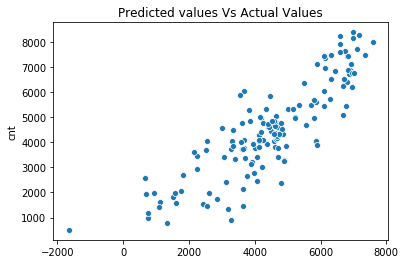

In [1383]:

plt.title("Predicted values Vs Actual Values")
sns.scatterplot(y_pred, y_test )



In [1395]:
Final_params = abs(round(lm_sm.params,2))

In [1396]:
Final_params.sort_values(ascending=False)

const                           4591.90
Light Rain/Snow/Thunderstorm    2770.76
yr                              2103.10
spring                          2049.78
windspeed                       1746.54
January                         1032.47
December                         990.01
November                         944.18
Misty, Cloudy                    785.71
Saturday                         617.81
September                        583.41
workingday                       545.77
dtype: float64

## Recommendation

### Top 3 significant features are Light Rain/Snow/Thunderstorm, Year and Windspeed  
### It is highly recommended for company to come up with a plan to increase demand on the day of Heavy storm and when windspeed is quite high.
### Also to come up with some promotional offers in the season of spring.